# Table of Contents
 <p><div class="lev1"><a href="#Libraries-and-Functions">Libraries and Functions</a></div><div class="lev1"><a href="#Loading">Loading</a></div><div class="lev1"><a href="#2D-DCT-type-II-(Discrete-Cosine-Transform)">2D DCT type-II (Discrete Cosine Transform)</a></div><div class="lev2"><a href="#FCD1-Per-Subjects">FCD1 Per Subjects</a></div><div class="lev2"><a href="#FCD2-Per-Subjects">FCD2 Per Subjects</a></div><div class="lev2"><a href="#Moyenne-des-coefficients">Moyenne des coefficients</a></div><div class="lev1"><a href="#Modes">Modes</a></div><div class="lev1"><a href="#Plus-Value">Plus-Value</a></div><div class="lev1"><a href="#Tableaux">Tableaux</a></div><div class="lev2"><a href="#With-the-patient-p19">With the patient p19</a></div><div class="lev1"><a href="#Plot-/-$\tau$">Plot / $\tau$</a></div>

# Libraries and Functions

In [1]:
%pylab inline
import Tools.ext as Te
import Tools.display as Td
import Tools.functions as Tf
from scipy.stats import ranksums
from scipy.fftpack import idct

Populating the interactive namespace from numpy and matplotlib


In [2]:
# 7 Clusters from p15 for Deviations
# shape : 21 (subjects) x 7 (clusters) x 27 (w) x 57 (tau)
S = Te.data2array('FCDclust_p15_7/S6D.npy')[0,:-1,:,:,:,1]
KS = sorted([k.rstrip('.txt') for k in Te.os.listdir('../../TimeCourses/Jonathan/86/grey_matter_sansSB_sansLCR/')])
KSb = ['1a','2a','3a','4a','5a','1b','2b','3b','4b','5b']
KS2 = list(KS)
del KS2[5]

# Loading

In [6]:
TCDs, FCDs, FCDgs = {}, {}, {}
for k in KS:
    tc = Te.data2array('../../TimeCourses/Jonathan/512/grey_matter_sansSB_sansLCR/%s.txt'%k) # (TIME x SPACE)
    TCDs[k] = Tf.fPearsonCorrelation(tc.T)
    FCDgs[k] = Te.data2array('./DFC/Reg_512u_win_15_%s.npy'%k)
FCDsClu = Te.data2array('./FCDclust_p19_7/win_15_typ_512u.npy', dic=1)
FCDsFst = Te.data2array('./MDFC/win_15_typ_512u.npy', dic=1)
TNer = Te.data2array('./FCD_TN_Inter/win_15.npy', dic=1)
TNra = Te.data2array('./FCD_TN_Intra/win_15.npy', dic=1)
#Hag = {}
#for k in range(1,6):
#    Hag[k] = Te.data2array('./DATA_FCD_Hag/FCD2_998_win_30_suj_%s.npy' %k)

# 2D DCT type-II (Discrete Cosine Transform)

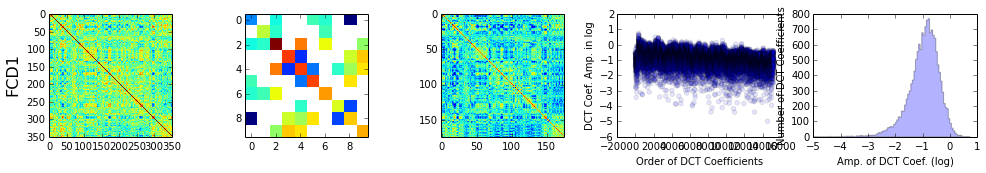

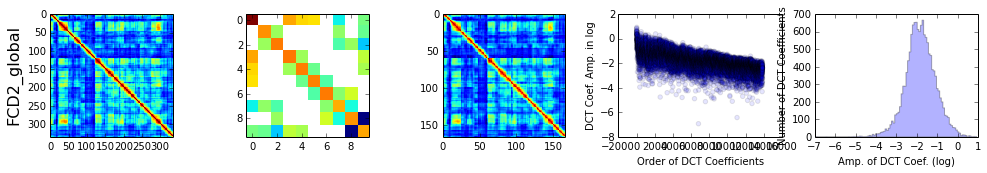

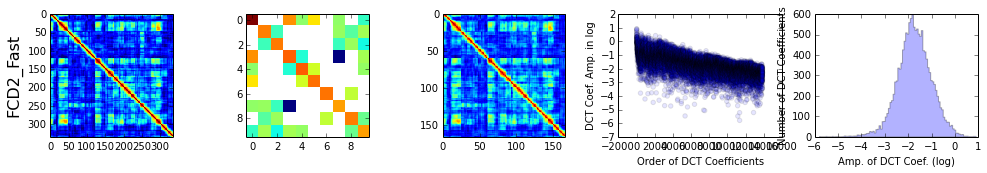

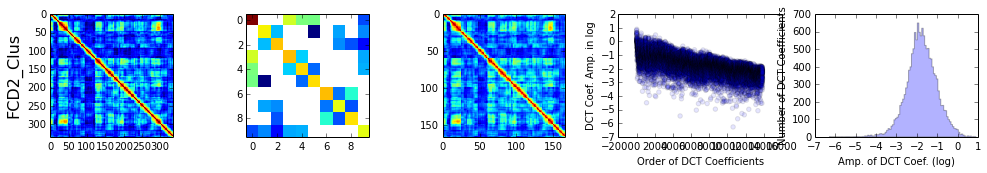

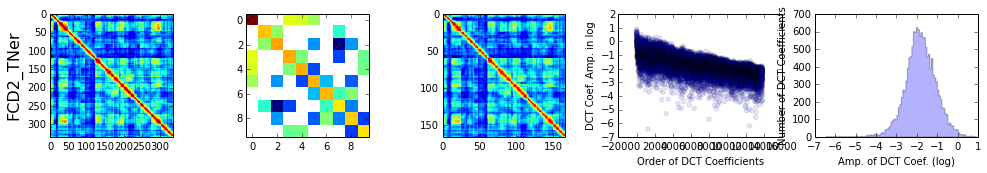

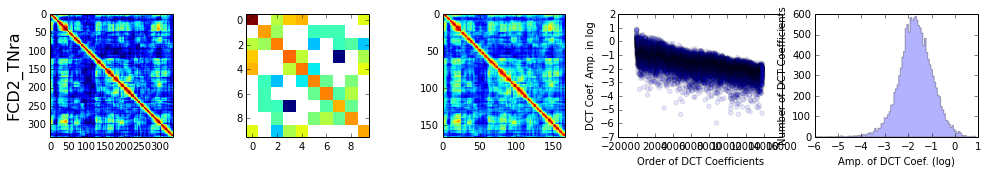

In [47]:
s = KS[2]; vmin = -1
for TT,tt in zip([TCDs[s], FCDgs[s],FCDsFst[s][1],FCDsClu[s][1], TNer[s], TNra[s]],
                  ['FCD1','FCD2_global','FCD2_Fast','FCD2_Clus','FCD2_TNer','FCD2_TNra']):
    dd = Tf.dct2D(TT)[:int(0.5*len(TT)),:int(0.5*len(TT))]
    ddr = abs(Tf.triInf(dd))
    f, (ax1,ax2,ax3,ax4,ax5) = subplots(1,5, figsize=(17,2.2))
    ax1.imshow(TT, interpolation='nearest', vmin=vmin, vmax=1); vmin=0
    ax1.set_ylabel(tt, size=16)
    ax2.imshow(log(dd)[:10,:10], interpolation='nearest') # 25% seulement de la matrices DCT
    ax3.imshow(idct(idct(dd.T, norm='ortho').T, norm='ortho'), interpolation='nearest');
    ax4.scatter(range(ddr.size), log10(ddr), alpha=.1)
    ax4.set_xlabel('Order of DCT Coefficients')
    ax4.set_ylabel('DCT Coef. Amp. in log');
    ax5.hist(log10(ddr), bins=100, alpha=.3, histtype='stepfilled')
    ax5.set_xlabel('Amp. of DCT Coef. (log)')
    ax5.set_ylabel('Number of DCT Coefficients');

## FCD1 Per Subjects

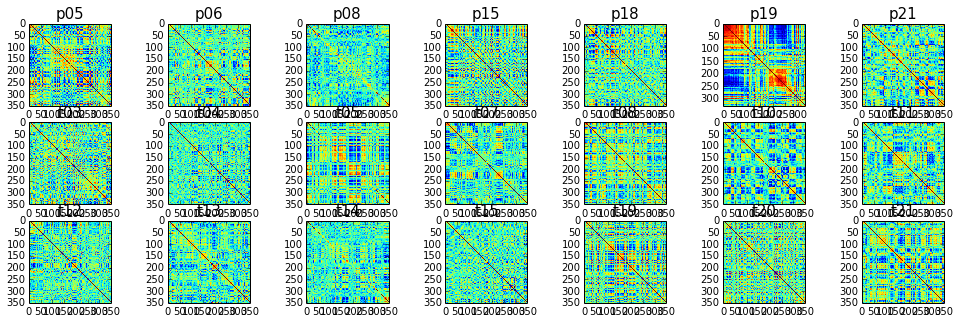

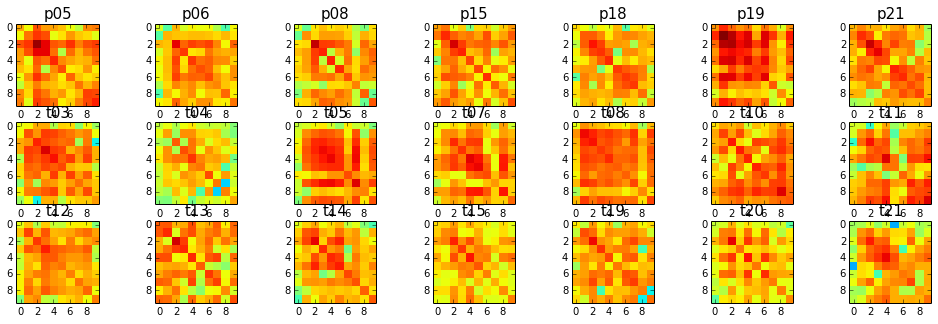

In [198]:
f, ax1 = subplots(3,7, figsize=(17,5))
f, ax2 = subplots(3,7, figsize=(17,5))
for k in range(len(KS)):
    TT = TCDs[KS[k]]#, FCDs[KS[2]][0]]:
    dd = Tf.dct2D(TT)[:int(0.5*len(TT)),:int(0.5*len(TT))]
    ddr = abs(dd)
    ax1[unravel_index(k,(3,7))].imshow(TT, interpolation='nearest')
    ax1[unravel_index(k,(3,7))].set_title(KS[k], size=15)
    ax2[unravel_index(k,(3,7))].imshow(log(ddr)[:10,:10], interpolation='nearest', vmin=-12, vmax=4) 
    ax2[unravel_index(k,(3,7))].set_title(KS[k], size=15)

## FCD2 Per Subjects

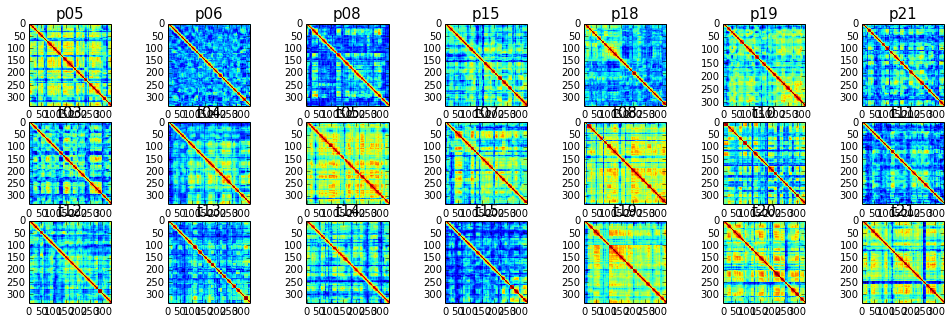

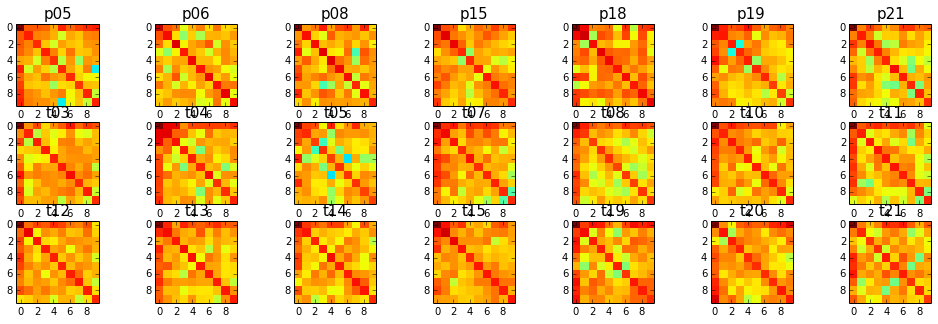

In [54]:
f, ax1 = subplots(3,7, figsize=(17,5))
f, ax2 = subplots(3,7, figsize=(17,5))
for k in range(len(KS)):
    TT = FCDsFst[KS[k]][1]
    dd = Tf.dct2D(TT)[:int(0.5*len(TT)),:int(0.5*len(TT))]
    ddr = abs(dd)
    ax1[unravel_index(k,(3,7))].imshow(TT, interpolation='nearest')
    ax1[unravel_index(k,(3,7))].set_title(KS[k], size=15)
    ax2[unravel_index(k,(3,7))].imshow(log(ddr)[:10,:10], interpolation='nearest', vmin=-12, vmax=4) 
    ax2[unravel_index(k,(3,7))].set_title(KS[k], size=15)

## Moyenne des coefficients

In [144]:
L = 350
sdd_p, sdd_c = zeros((L,L)),zeros((L,L))
for k in range(6):
    TT = TCDs[KS2[k]] #TT = FCDsFst[KS2[k]][0]
    dd = Tf.dct2D(TT)
    sdd_p += abs(dd)
for k in range(7,21):
    TT = TCDs[KS[k]] #TT = FCDsFst[KS[k]][0]
    dd = Tf.dct2D(TT)
    sdd_c += abs(dd)

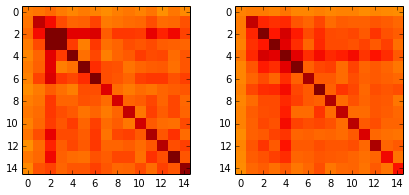

In [145]:
ii = 15
f, ax = subplots(1,2, figsize=(7,3))
ax[0].imshow((sdd_p)[:ii,:ii]/6., interpolation='nearest', vmin=-12, vmax=4) 
ax[1].imshow((sdd_c)[:ii,:ii]/14., interpolation='nearest', vmin=-12, vmax=4);

---
# Modes

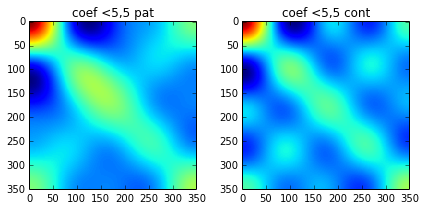

In [130]:
f, ax = subplots(1,2, figsize=(7,3))
zz1,zz2 = zeros((350,350)),zeros((350,350))
zz1[:5,:5] = (sdd_p)[:5,:5]
zz2[:5,:5] = (sdd_c)[:5,:5]
inv_dd1 = idct(zz1)
inv_dd1 = idct(inv_dd1.T).T
inv_dd2 = idct(zz2)
inv_dd2 = idct(inv_dd2.T).T
ax[0].imshow(inv_dd1, interpolation='nearest'); ax[0].set_title('coef <5,5 pat');
ax[1].imshow(inv_dd2, interpolation='nearest'); ax[1].set_title('coef <5,5 cont');

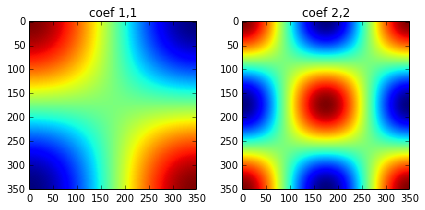

In [99]:
f, ax = subplots(1,2, figsize=(7,3))
zz1,zz2 = zeros((350,350)),zeros((350,350))
zz1[1,1] = zz2[2,2] = 1
inv_dd1 = idct(zz1)
inv_dd1 = idct(inv_dd1.T).T
inv_dd2 = idct(zz2)
inv_dd2 = idct(inv_dd2.T).T
ax[0].imshow(inv_dd1, interpolation='nearest'); ax[0].set_title('coef 1,1');
ax[1].imshow(inv_dd2, interpolation='nearest'); ax[1].set_title('coef 2,2');

---
# Plus-Value

In [10]:
# Coefficients
DD = []
for k in range(21):
    tmp = TCDs[KS[k]]
    DD.append( Tf.dct2D(tmp)[:329,:329] )
DD = array(DD)

In [12]:
Te.array2data(DD, 'DATA_sampleForClassification.npy')

In [5]:
# Coefficients
DD = []
for k in range(20):
    tmp = FCDsClu[KS2[k]][0]
    DD.append( Tf.dct2D(tmp) )
DD = array(DD)

In [6]:
# Ranksum
Lcoef = len(DD[0])
rks_coef = zeros((Lcoef,Lcoef))
for i in range(Lcoef):
    for j in range(Lcoef):
        pat = DD[0:6,i,j]
        con = DD[6:20,i,j]
        rks_coef[i,j] = ranksums(pat, con)[1] #* (-1) ** (mean(pat) > mean(con))

In [213]:
print 'Proportion < 5%% : %.3f%%' %(where(rks_coef <= 0.05, 1., 0).sum() / Lcoef**2.)
print 'Proportion < 1%% : %.3f%%' %(where(rks_coef <= 0.01, 1., 0).sum() / Lcoef**2.)

Proportion < 5% : 0.046%
Proportion < 1% : 0.006%


In [241]:
l = 20
print 'Proportion < 5%% : %.3f%%' %(where(rks_coef[:l] <= 0.05, 1., 0).sum() / l**2.)
print 'Proportion < 1%% : %.3f%%' %(where(rks_coef[:l] <= 0.01, 1., 0).sum() / l**2.)

Proportion < 5% : 0.925%
Proportion < 1% : 0.128%


In [8]:
l = 20
print 'Proportion < 5%% : %.3f%%' %(where(rks_coef[:l] <= 0.05, 1., 0).sum() / l**2.)
print 'Proportion < 1%% : %.3f%%' %(where(rks_coef[:l] <= 0.01, 1., 0).sum() / l**2.)

Proportion < 5% : 0.965%
Proportion < 1% : 0.145%


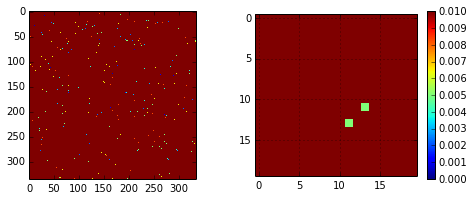

In [9]:
f, ax1 = subplots(1,2, figsize=(8,3))
b = ax1[0].imshow(rks_coef, interpolation='nearest', vmin=0, vmax=0.01);
ax1[1].imshow(rks_coef[:l,:l], interpolation='nearest', vmin=0, vmax=0.01); f.colorbar(b); grid()

---
# Tableaux

In [182]:
clu, M = 5, 10
o = 2*clu + 4
K = KS2
metrics = zeros((len(K), o, M)) # 20(sujets) * 14(TCD+FCDg+2TNs+2*5rangs) * 10(metrics)
for s in range(len(K)):
    k = -1
    for TT in [TCDs[K[s]], FCDgs[K[s]], TNer[K[s]], TNra[K[s]]]:
        tri10 = 1.- diag(TT, k=int(0.1*len(TT)))
        tri50 = 1.- diag(TT, k=int(0.5*len(TT)))
        dd = Tf.dct2D(TT)[:int(0.5*len(TT)),:int(0.5*len(TT))]
        ddr = abs(Tf.triInf(dd)); k+=1
        metrics[s,k] = mean(ddr), mean(log10(ddr)), median(ddr), polyfit(arange(len(ddr)), log10(ddr), 1)[0],\
                       mean(tri10), median(tri10), mean(tri50), median(tri50), dd[2,2], dd[2,3]
        
    for tmp in [FCDsFst[K[s]], FCDsClu[K[s]]]:
        for ik in range(clu):
            TT = tmp[ik]
            tri10 = 1.- diag(TT, k=int(0.1*len(TT)))
            tri50 = 1.- diag(TT, k=int(0.5*len(TT)))
            dd = Tf.dct2D(TT)[:int(0.5*len(TT)),:int(0.5*len(TT))]
            ddr = abs(Tf.triInf(dd)); k+=1
            metrics[s,k] = mean(ddr), mean(log10(ddr)), median(ddr), polyfit(arange(len(ddr)), log10(ddr), 1)[0],\
                           mean(tri10), median(tri10), mean(tri50), median(tri50), dd[2,2], dd[2,3]

In [183]:
# ranksum
rks = zeros((o, M))
for t in range(M):
    for k in range(o):
        pat = metrics[0:6,k,t] #0:7,k,t]
        con = metrics[6:20,k,t] #7:21,k,t]
        rks[k,t] = ranksums(pat, con)[1] #* (-1) ** (mean(pat) > mean(con))

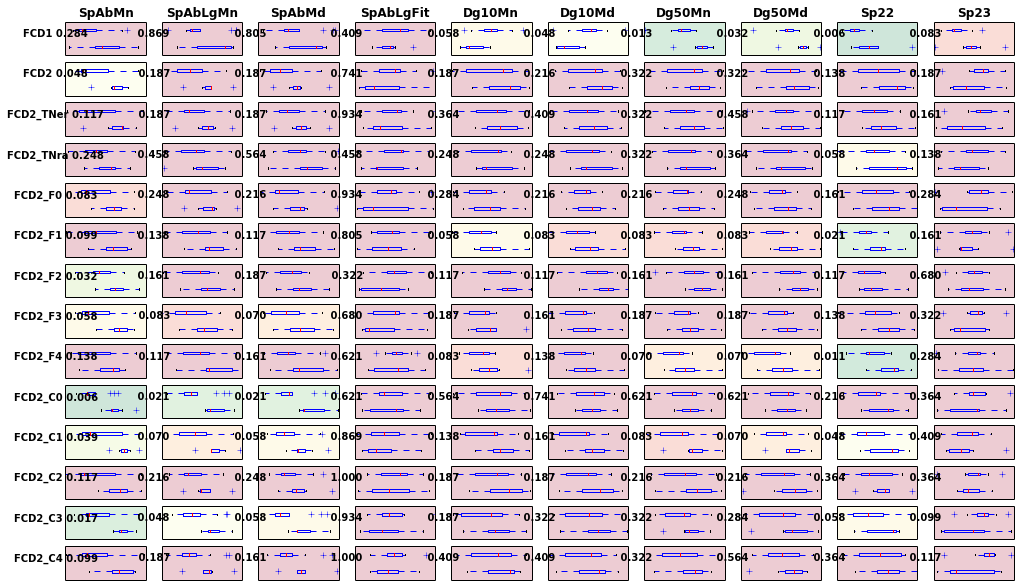

In [184]:
# En Bas == Patients
f, ax = subplots(o, M, figsize=(17,10), sharex=False)
lbls = ['SpAbMn','SpAbLgMn','SpAbMd','SpAbLgFit','Dg10Mn','Dg10Md','Dg50Mn','Dg50Md','Sp22','Sp23']
lblt = ['FCD1','FCD2','FCD2_TNer','FCD2_TNra',\
        'FCD2_F0','FCD2_F1','FCD2_F2','FCD2_F3','FCD2_F4',\
        'FCD2_C0','FCD2_C1','FCD2_C2','FCD2_C3','FCD2_C4']
for k in range(o):
    for t in range(M):
        if k == 0: ax[k,t].set_title(lbls[t], fontsize=12, fontweight='bold')
        if t == 0: llt = lblt
        else: llt = (o) * ['']
        ax[k,t].boxplot([metrics[0:7,k,t], metrics[7:21,k,t]], vert=0)
        ax[k,t].set_ylabel('%s %.3f'% (llt[k], rks[k,t]), rotation=0, labelpad=10, fontsize=10, fontweight='bold')
        ax[k,t].get_xaxis().set_visible(False)
        ax[k,t].get_yaxis().set_ticks([])
        clr = list(cm.get_cmap('RdYlGn_r')(rks[k,t] / 0.1)); clr[-1] = 0.2
        ax[k,t].set_axis_bgcolor(clr)

## With the patient p19

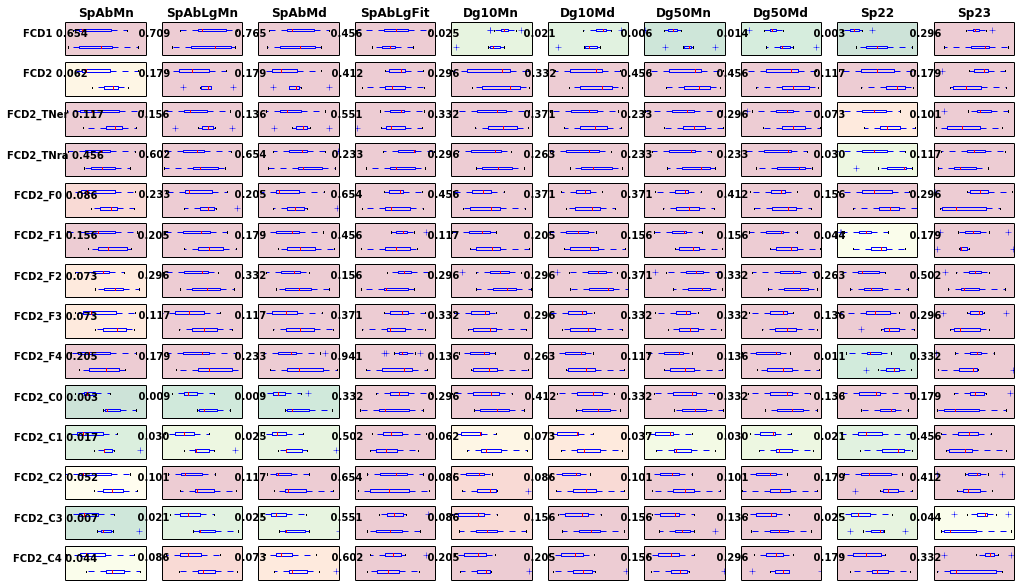

In [181]:
# En Bas == Patients
f, ax = subplots(o, M, figsize=(17,10), sharex=False)
lbls = ['SpAbMn','SpAbLgMn','SpAbMd','SpAbLgFit','Dg10Mn','Dg10Md','Dg50Mn','Dg50Md','Sp22','Sp23']
lblt = ['FCD1','FCD2','FCD2_TNer','FCD2_TNra',\
        'FCD2_F0','FCD2_F1','FCD2_F2','FCD2_F3','FCD2_F4',\
        'FCD2_C0','FCD2_C1','FCD2_C2','FCD2_C3','FCD2_C4']
for k in range(o):
    for t in range(M):
        if k == 0: ax[k,t].set_title(lbls[t], fontsize=12, fontweight='bold')
        if t == 0: llt = lblt
        else: llt = (o) * ['']
        ax[k,t].boxplot([metrics[0:7,k,t], metrics[7:21,k,t]], vert=0)
        ax[k,t].set_ylabel('%s %.3f'% (llt[k], rks[k,t]), rotation=0, labelpad=10, fontsize=10, fontweight='bold')
        ax[k,t].get_xaxis().set_visible(False)
        ax[k,t].get_yaxis().set_ticks([])
        clr = list(cm.get_cmap('RdYlGn_r')(rks[k,t] / 0.1)); clr[-1] = 0.2
        ax[k,t].set_axis_bgcolor(clr)

---
# Plot / $\tau$ 

In [245]:
T = 350

In [244]:
met2 = zeros((20, 2, T, 2)) # 21(sujets) * 2(types) * 350(tau) * 2(metrics)
for s in range(len(KS2)):
    for tau in range(len(TT)):
        tri1 = 1.- diag(TCDs[KS[s]], k=tau)
        tri2 = 1.- diag(FCDgs[KS[s]], k=tau)
        met2[s,0,tau,:] = mean(tri1), median(tri1)  
        met2[s,1,tau,:] = mean(tri2), median(tri2)        

In [249]:
# ranksum
rks2 = zeros((2,T,2))
for m in range(2):
    for k in range(2):
        for t in range(T):
            pat = met2[0:6,k,t,m]
            con = met2[6:20,k,t,m]
            rks2[k,t,m] = ranksums(pat, con)[1] #* (-1) ** (mean(pat) > mean(con))

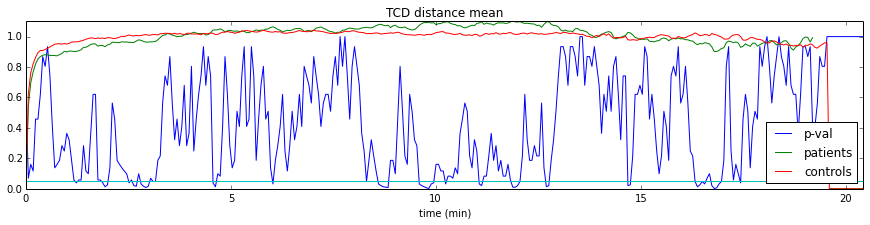

In [275]:
figure(figsize=(15,3))
tm = linspace(0,T*3.5/60.,T); xlabel('time (min)'); title('TCD distance mean')
plot(tm, rks2[0,:,0], label='p-val')
plot(tm, met2[0:6,0,:,0].mean(0), label='patients')
plot(tm, met2[6:20,0,:,0].mean(0), label='controls')
plot(0.05*ones(T)); legend(loc=4); ylim(0,1.1); xlim(tm.min(),tm.max());

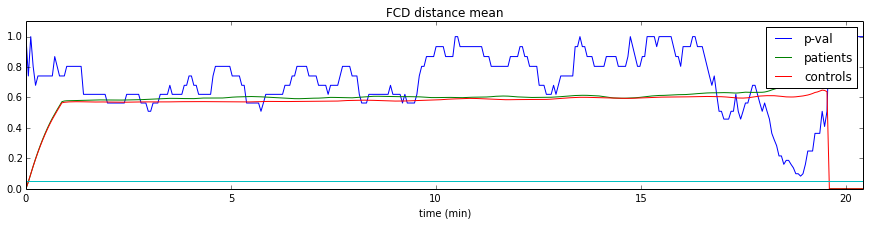

In [276]:
figure(figsize=(15,3))
tm = linspace(0,T*3.5/60.,T); xlabel('time (min)'); title('FCD distance mean')
plot(tm, rks2[1,:,0], label='p-val')
plot(tm, met2[0:6,1,:,0].mean(0), label='patients')
plot(tm, met2[6:20,1,:,0].mean(0), label='controls')
plot(0.05*ones(T)); legend(loc=1); ylim(0,1.1); xlim(tm.min(),tm.max());